### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [32]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [44]:
#用來看數據資訊
for key,value in digits.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

data (1797, 64)
target (1797,)
target_names (10,)
images (1797, 8, 8)
DESCR


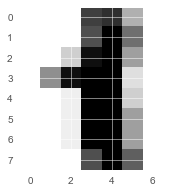

In [34]:
#畫出第一個圖片
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [69]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=4)

# 建立模型
clf = GradientBoostingClassifier(n_estimators=1000)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [65]:
print(np.bincount(digits.target))

[178 182 177 183 181 182 181 179 174 180]


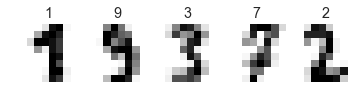

In [66]:
pick = np.random.randint(1,450, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(8, 8), cmap='Greys')
    plt.title(y_pred[pick[i]])
    plt.axis("off")

In [67]:
import pandas as pd
pd.crosstab(y_test, y_pred, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,47,0,0,0,0,0,0,0,1,0
1,1,37,0,1,0,0,0,0,0,0
2,1,0,47,0,0,0,0,0,0,0
3,0,1,0,41,0,0,0,0,1,0
4,0,0,0,0,40,2,0,0,0,0
5,0,0,0,0,0,47,0,0,0,2
6,0,0,0,0,0,0,37,0,2,0
7,0,0,1,0,0,0,0,48,0,0
8,0,1,0,0,0,0,0,0,42,0


In [68]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9622222222222222
